In [1]:
! pip install -q TensorFlow

     |████████████████████████████████| 462 kB 11.2 MB/s 


In [2]:
! pip install -q imblearn

In [3]:
from imblearn.over_sampling import SMOTE


In [4]:
import sklearn
from sklearn.feature_selection import RFECV, RFE

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
df = pd.read_csv('/content/data.csv' )
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946719 entries, 0 to 946718
Data columns (total 54 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     946719 non-null  int64  
 1   Timestamp      946719 non-null  object 
 2   FIT101         946719 non-null  float64
 3   LIT101         946719 non-null  float64
 4   MV101          946719 non-null  int64  
 5   P101           946719 non-null  int64  
 6   P102           946719 non-null  int64  
 7   AIT201         946719 non-null  float64
 8   AIT202         946719 non-null  float64
 9   AIT203         946719 non-null  float64
 10  FIT201         946719 non-null  float64
 11  MV201          946719 non-null  int64  
 12  P201           946719 non-null  int64  
 13  P202           946719 non-null  int64  
 14  P203           946719 non-null  int64  
 15  P204           946719 non-null  int64  
 16  P205           946719 non-null  int64  
 17  P206           946719 non-nul

In [7]:
y = df['Normal/Attack']
y

0         0
1         0
2         0
3         0
4         0
         ..
946714    0
946715    0
946716    0
946717    0
946718    0
Name: Normal/Attack, Length: 946719, dtype: int64

In [8]:
# признаки отобранные по корреляционный матрице
columns_taken_manually = ['FIT101','LIT101','P102','AIT202','P201','P204','DPIT301','LIT301','MV301','MV303','P301','AIT401','P403','AIT503','AIT504','FIT601']
x_mnl = df[columns_taken_manually]

x_mnl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946719 entries, 0 to 946718
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   FIT101   946719 non-null  float64
 1   LIT101   946719 non-null  float64
 2   P102     946719 non-null  int64  
 3   AIT202   946719 non-null  float64
 4   P201     946719 non-null  int64  
 5   P204     946719 non-null  int64  
 6   DPIT301  946719 non-null  float64
 7   LIT301   946719 non-null  float64
 8   MV301    946719 non-null  int64  
 9   MV303    946719 non-null  int64  
 10  P301     946719 non-null  int64  
 11  AIT401   946719 non-null  float64
 12  P403     946719 non-null  int64  
 13  AIT503   946719 non-null  float64
 14  AIT504   946719 non-null  float64
 15  FIT601   946719 non-null  float64
dtypes: float64(9), int64(7)
memory usage: 122.8 MB


In [9]:
x_all_features = df.drop(columns = ['Unnamed: 0', 'Timestamp', 'Normal/Attack'], axis = 1)

x_all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946719 entries, 0 to 946718
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   FIT101   946719 non-null  float64
 1   LIT101   946719 non-null  float64
 2   MV101    946719 non-null  int64  
 3   P101     946719 non-null  int64  
 4   P102     946719 non-null  int64  
 5   AIT201   946719 non-null  float64
 6   AIT202   946719 non-null  float64
 7   AIT203   946719 non-null  float64
 8   FIT201   946719 non-null  float64
 9   MV201    946719 non-null  int64  
 10  P201     946719 non-null  int64  
 11  P202     946719 non-null  int64  
 12  P203     946719 non-null  int64  
 13  P204     946719 non-null  int64  
 14  P205     946719 non-null  int64  
 15  P206     946719 non-null  int64  
 16  DPIT301  946719 non-null  float64
 17  FIT301   946719 non-null  float64
 18  LIT301   946719 non-null  float64
 19  MV301    946719 non-null  int64  
 20  MV302    946719 non-null  

# отберем признаки для регрессии при помощи RFECV

In [10]:
x_train, x_test, y_train, y_test =  train_test_split( x_all_features,  y , train_size = 0.8, stratify = y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(757375, 51)
(757375,)
(189344, 51)
(189344,)


In [11]:
from sklearn.feature_selection import RFECV

estimator = LogisticRegression()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(x_test, y_test)
selector.support_ 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False])

In [12]:
# оптимальные признаки
cols_selected = selector.ranking_

In [13]:
# оптимальное количество признаков = 20.
sum(selector.support_)

20

In [14]:
cols_all = x_all_features.columns
r=[]

for elem in range(len(cols_selected)):
  if cols_selected[elem] == 1 :
    r.append(cols_all[elem] )

x = x_all_features[r]

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946719 entries, 0 to 946718
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MV101    946719 non-null  int64  
 1   P101     946719 non-null  int64  
 2   P102     946719 non-null  int64  
 3   FIT201   946719 non-null  float64
 4   MV201    946719 non-null  int64  
 5   P201     946719 non-null  int64  
 6   P203     946719 non-null  int64  
 7   P205     946719 non-null  int64  
 8   DPIT301  946719 non-null  float64
 9   FIT301   946719 non-null  float64
 10  MV301    946719 non-null  int64  
 11  MV302    946719 non-null  int64  
 12  MV304    946719 non-null  int64  
 13  P302     946719 non-null  int64  
 14  AIT401   946719 non-null  float64
 15  FIT401   946719 non-null  float64
 16  UV401    946719 non-null  int64  
 17  P501     946719 non-null  int64  
 18  PIT502   946719 non-null  float64
 19  FIT601   946719 non-null  float64
dtypes: float64(7), int64(13)
m

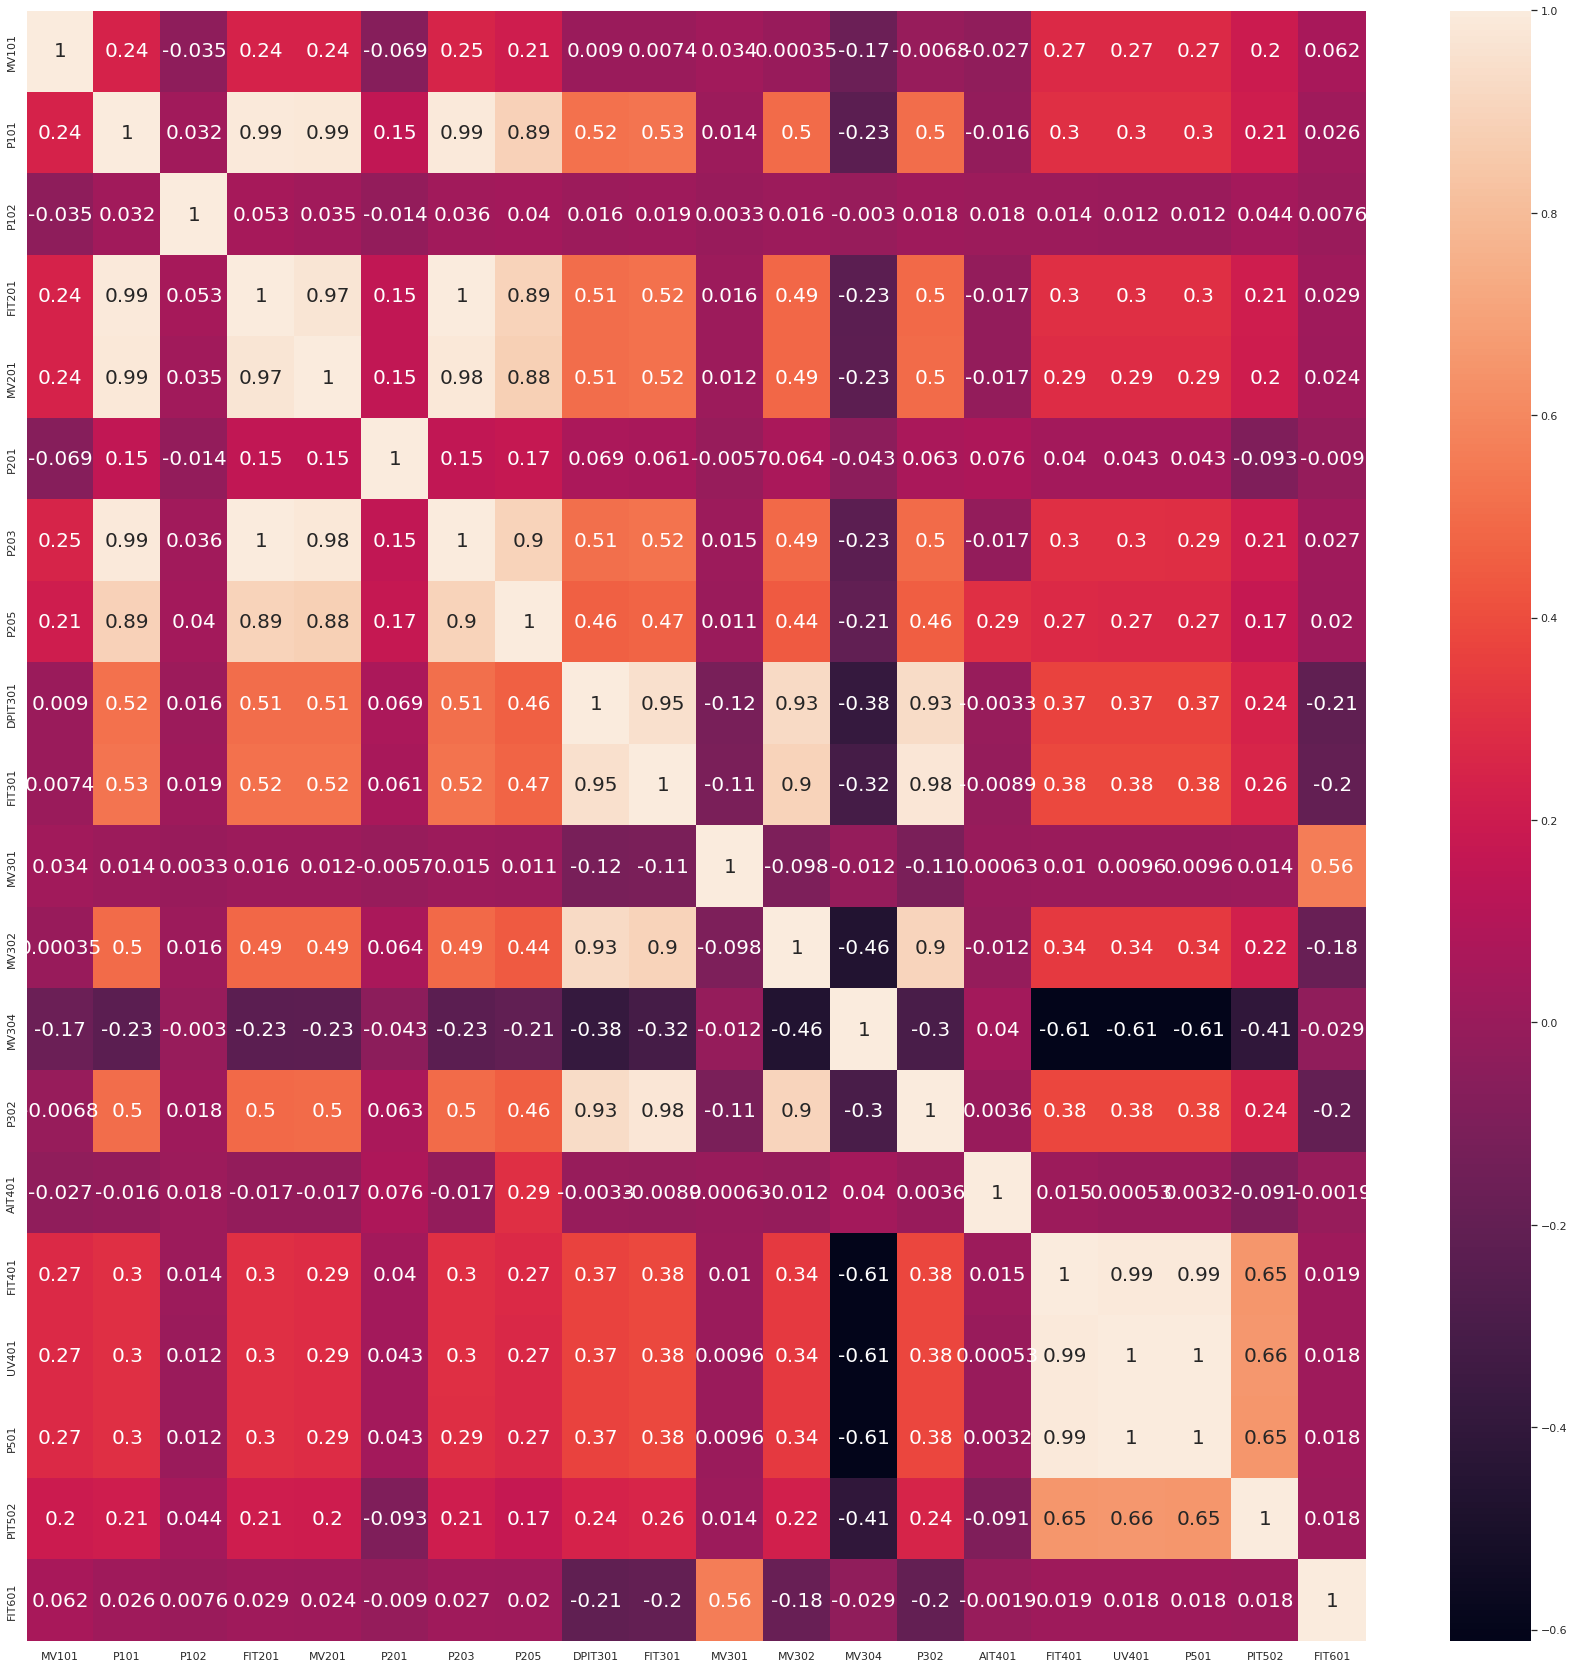

In [35]:
import seaborn as sn
# Numeric columns of the dataset
numeric_col = x.columns
# Correlation Matrix formation
corr_matrix = df.loc[:,numeric_col].corr()
#print(corr_matrix)
plt.figure(figsize = (30,30))
sn.heatmap(corr_matrix, annot=True, annot_kws={'fontsize':20})

# fit - predict

In [37]:
x_train, x_test, y_train, y_test =  train_test_split( x,  y , train_size = 0.8, stratify = y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(757375, 20)
(757375,)
(189344, 20)
(189344,)


In [ ]:
## проверено, что со SMOTE модель хуже работает - не использую.
#x_train, y_train = SMOTE().fit_resample(x_train, y_train)
#print(y_train.value_counts())

0.0    713715
1.0    713715
Name: Normal/Attack, dtype: int64


In [38]:
logisticRegr = LogisticRegression()

In [39]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [40]:
predictions = logisticRegr.predict(x_test)

predictions

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
score = logisticRegr.score(x_test, y_test)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print('accuracy: ' , round(score,2))
print('precision: ' , round(precision,2))
print('recall: ' , round(recall,2))
print('f1_score: ' , round(2*precision*recall/(precision+recall),2))

accuracy:  0.98
precision:  0.99
recall:  0.7
f1_score:  0.82


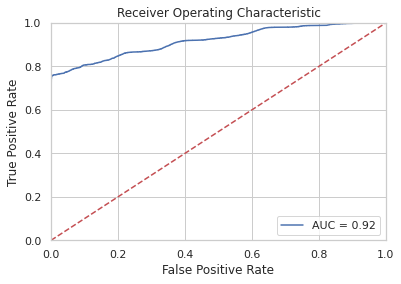

In [29]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logisticRegr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
r = multilabel_confusion_matrix(y_test, predictions)

r

array([[[  7693,   3231],
        [    60, 178360]],

       [[178360,     60],
        [  3231,   7693]]])